In [ ]:
!sudo apt install - y python3-opencv


Reading package lists... Done
Building dependency tree       
Reading state information... Done
python3-opencv is already the newest version (4.2.0+dfsg-5).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.


In [ ]:
!pip install rasterio matplotlib seaborn numpy opencv-python tensorflow


In [ ]:
import rasterio
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2
import copy
from keras.preprocessing.image import save_img
from keras.preprocessing.image import img_to_array
%matplotlib inline


2021-11-08 06:23:16.987005: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ubuntu/.local/lib/python3.8/site-packages/cv2/../../lib64:
2021-11-08 06:23:16.987064: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [ ]:
band3 = rasterio.open(
    "/home/ubuntu/3rd-Year-Project/NDWI/Images/LC08_L2SP_141045_20210516_20210525_02_T1_SR_B3.TIF")
band5 = rasterio.open(
    "/home/ubuntu/3rd-Year-Project/NDWI/Images/LC08_L2SP_141045_20210516_20210525_02_T1_SR_B5.TIF")
band6 = rasterio.open(
    "/home/ubuntu/3rd-Year-Project/NDWI/Images/LC08_L2SP_141045_20210516_20210525_02_T1_SR_B6.TIF")
band7 = rasterio.open(
    "/home/ubuntu/3rd-Year-Project/NDWI/Images/LC08_L2SP_141045_20210516_20210525_02_T1_SR_B7.TIF")


In [ ]:
green = band3.read(1).astype("float32")
nir = band5.read(1).astype("float32")
swir1 = band6.read(1).astype("float32")
swir2 = band7.read(1).astype("float32")


In [ ]:
ndwi = np.where(
    (green+nir) == 0.,
    0,
    (green-nir)/(green+nir)
)

ndwisw1 = np.where(
    (green+swir1) == 0.,
    0,
    (green-swir1)/(green+swir1)
)

ndwisw2 = np.where(
    (green+swir2) == 0.,
    0,
    (green-swir2)/(green+swir2)
)


/tmp/ipykernel_1889/2585301918.py:4: RuntimeWarning: invalid value encountered in true_divide
  (green-nir)/(green+nir)
/tmp/ipykernel_1889/2585301918.py:10: RuntimeWarning: invalid value encountered in true_divide
  (green-swir1)/(green+swir1)
/tmp/ipykernel_1889/2585301918.py:16: RuntimeWarning: invalid value encountered in true_divide
  (green-swir2)/(green+swir2)


In [ ]:
ndwi_copy = copy.copy(ndwi)
ndwi_copy[ndwi > 0] = -100

ndwisw1_copy = copy.copy(ndwisw1)
ndwisw1_copy[ndwisw1 > 0] = -100

ndwisw2_copy = copy.copy(ndwisw2)
ndwisw2_copy[ndwisw2 > 0] = -100


/home/ubuntu/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


353459


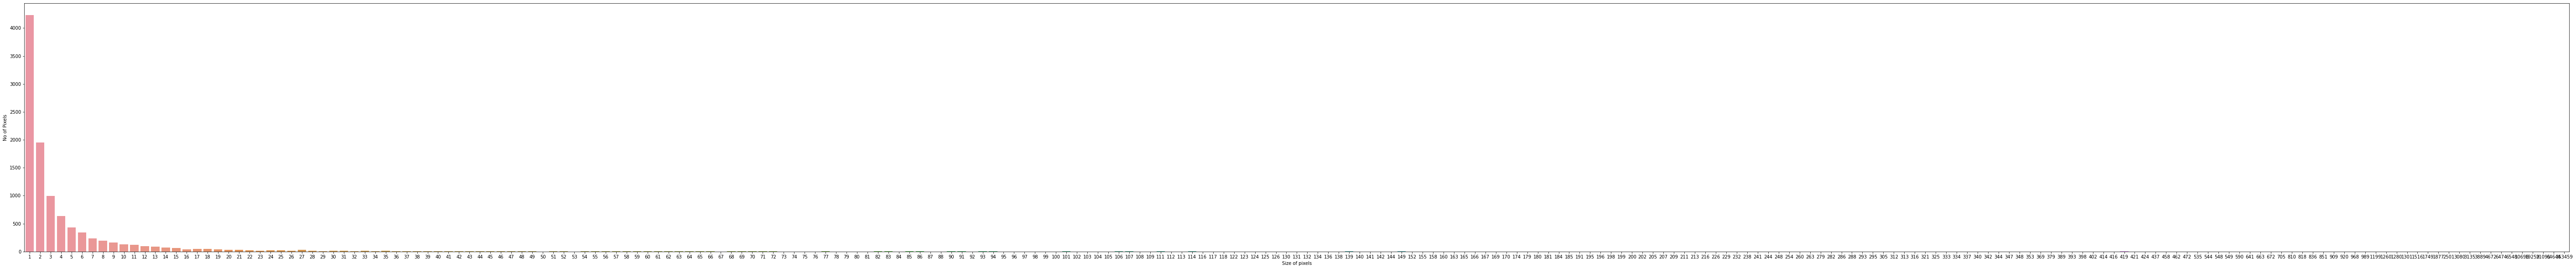

In [ ]:
median_ndwi_copy = cv2.medianBlur(ndwi_copy, 5)

img = cv2.threshold(np.uint8(ndwi_copy), 0, 255, cv2.THRESH_BINARY)[1]

nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(img)
sizes = stats[1:, -1]
nb_components = nb_components - 1

min_size = 50
sizes_map = {}

ndwi_components = np.zeros((output.shape))
for i in range(0, nb_components):
    if sizes[i] in sizes_map.keys():
        sizes_map[sizes[i]] += 1
    else:
        sizes_map[sizes[i]] = 1

    if sizes[i] >= min_size:
        ndwi_components[output == i + 1] = -100

plt.figure(figsize=(100, 10))
sns.barplot(list(sizes_map.keys()), list(sizes_map.values()))
plt.xlabel('Size of pixels')
plt.ylabel('No of Pixels')
print(max(sizes_map.keys()))


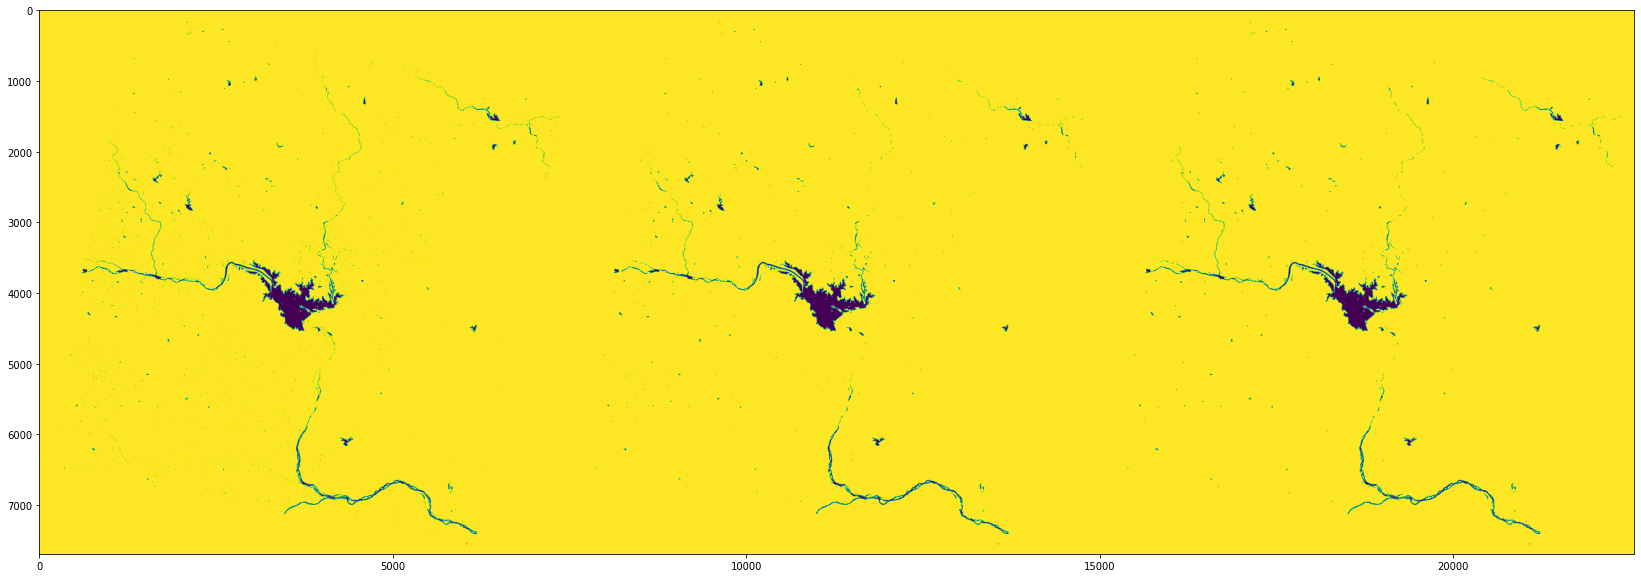

In [ ]:
ndwi_components = np.float32(ndwi_components)
compare_ndwi_copy = cv2.hconcat([ndwi_copy, median_ndwi_copy, ndwi_components])
plt.figure(figsize=(30, 10))
plt.imshow(compare_ndwi_copy)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


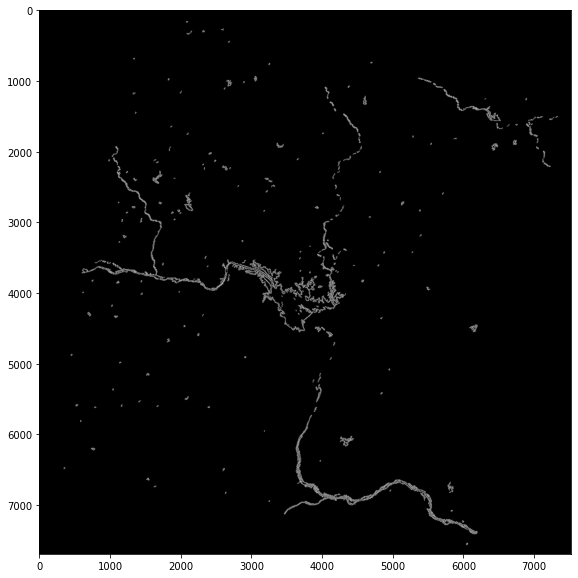

In [ ]:
ndwi_components = img_to_array(ndwi_components)
save_img('image_save_ndwi_components.jpg', ndwi_components)
image_ndwi_components = cv2.imread('image_save_ndwi_components.jpg')

img_blur_ndwi_components = cv2.GaussianBlur(image_ndwi_components, (3, 3), 0)
sobel_ndwi_components = cv2.Sobel(
    src=img_blur_ndwi_components, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)
plt.figure(figsize=(10, 10))
plt.imshow(sobel_ndwi_components)


/home/ubuntu/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'No of Pixels')

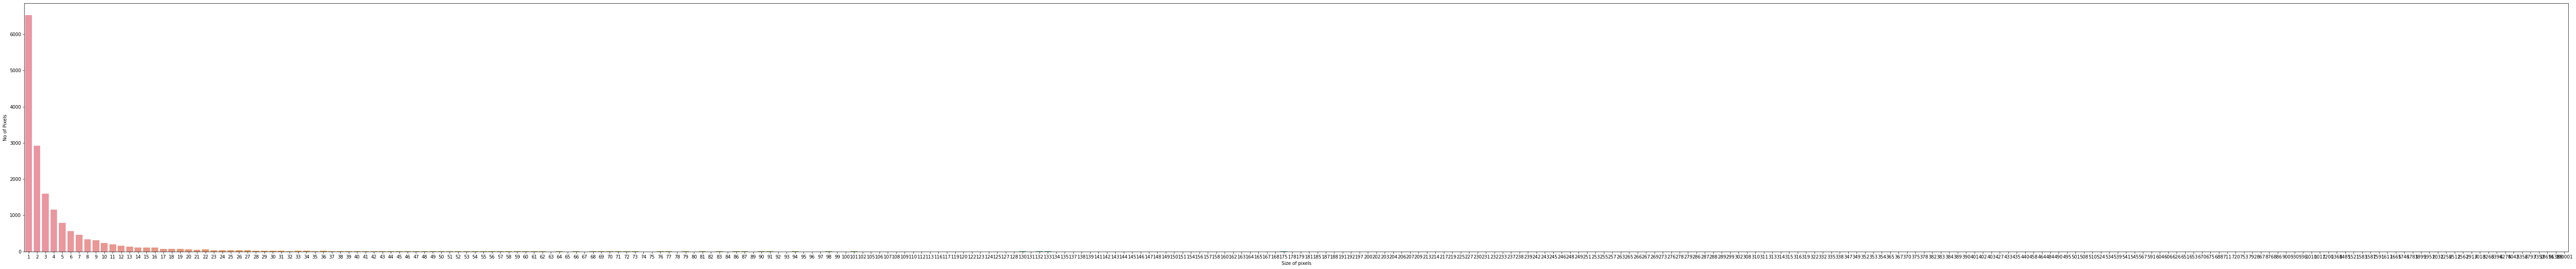

In [ ]:
median_ndwisw1_copy = cv2.medianBlur(ndwisw1_copy, 5)

img = cv2.threshold(np.uint8(ndwisw1_copy), 0, 255, cv2.THRESH_BINARY)[1]

nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(img)
sizes = stats[1:, -1]
nb_components = nb_components - 1

min_size = 50
sizes_map = {}

ndwisw1_components = np.zeros((output.shape))
for i in range(0, nb_components):
    if sizes[i] in sizes_map.keys():
        sizes_map[sizes[i]] += 1
    else:
        sizes_map[sizes[i]] = 1

    if sizes[i] >= min_size:
        ndwisw1_components[output == i + 1] = -100

plt.figure(figsize=(100, 10))
sns.barplot(list(sizes_map.keys()), list(sizes_map.values()))
plt.xlabel('Size of pixels')
plt.ylabel('No of Pixels')


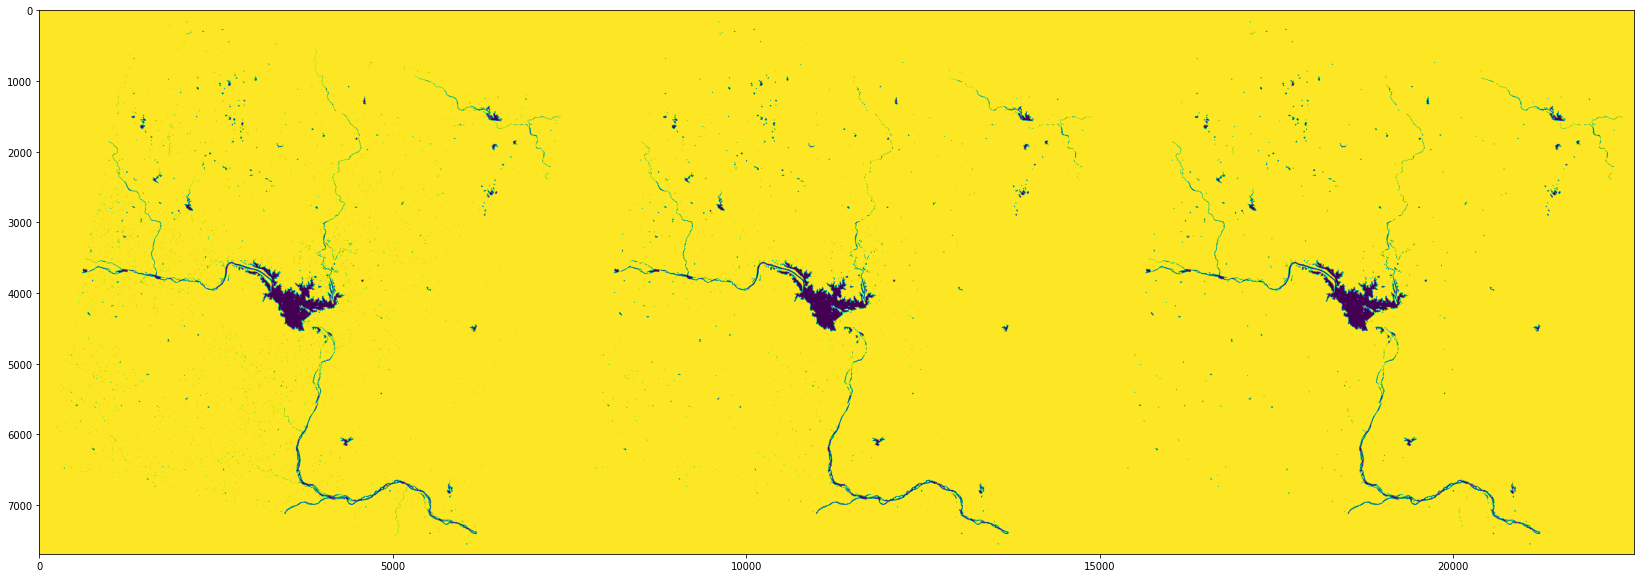

In [ ]:
ndwisw1_components = np.float32(ndwisw1_components)
compare_ndwisw1_copy = cv2.hconcat(
    [ndwisw1_copy, median_ndwisw1_copy, ndwisw1_components])
plt.figure(figsize=(30, 10))
plt.imshow(compare_ndwisw1_copy)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


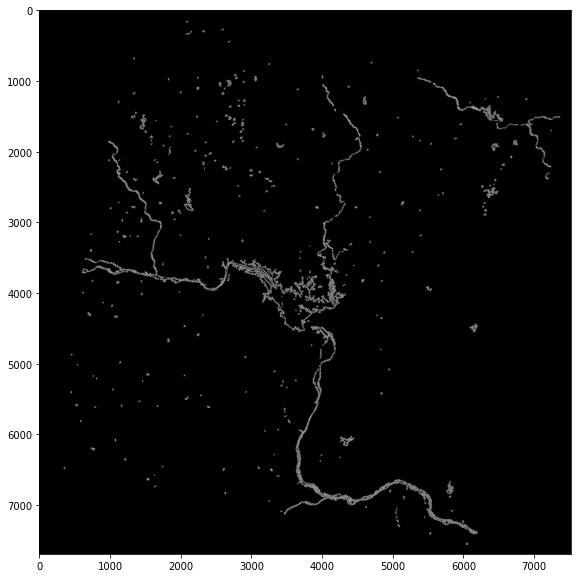

In [ ]:
ndwisw1_components = img_to_array(ndwisw1_components)
save_img('image_save_ndwisw1_components.jpg', ndwisw1_components)
image_ndwisw1_components = cv2.imread('image_save_ndwisw1_components.jpg')

img_blur_ndwisw1_components = cv2.GaussianBlur(
    image_ndwisw1_components, (3, 3), 0)
sobel_ndwisw1_components = cv2.Sobel(
    src=img_blur_ndwisw1_components, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)
plt.figure(figsize=(10, 10))
plt.imshow(sobel_ndwisw1_components)


/home/ubuntu/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'No of Pixels')

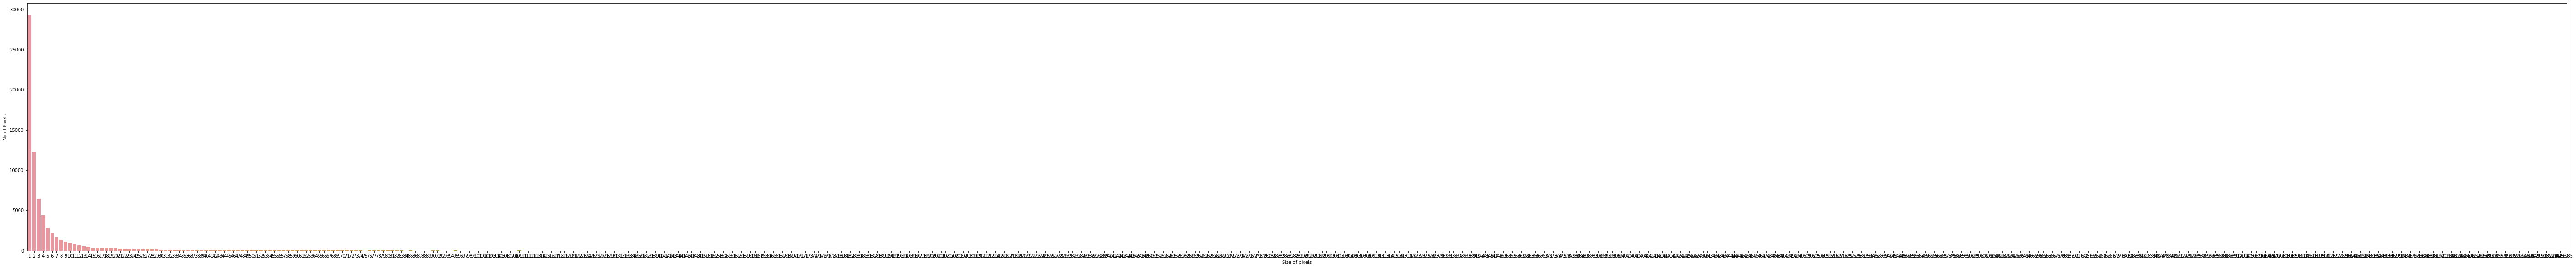

In [ ]:
median_ndwisw2_copy = cv2.medianBlur(ndwisw2_copy, 5)

img = cv2.threshold(np.uint8(ndwisw2_copy), 0, 255, cv2.THRESH_BINARY)[1]

nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(img)
sizes = stats[1:, -1]
nb_components = nb_components - 1

min_size = 50
sizes_map = {}

ndwisw2_components = np.zeros((output.shape))
for i in range(0, nb_components):
    if sizes[i] in sizes_map.keys():
        sizes_map[sizes[i]] += 1
    else:
        sizes_map[sizes[i]] = 1

    if sizes[i] >= min_size:
        ndwisw2_components[output == i + 1] = -100

plt.figure(figsize=(100, 10))
sns.barplot(list(sizes_map.keys()), list(sizes_map.values()))
plt.xlabel('Size of pixels')
plt.ylabel('No of Pixels')


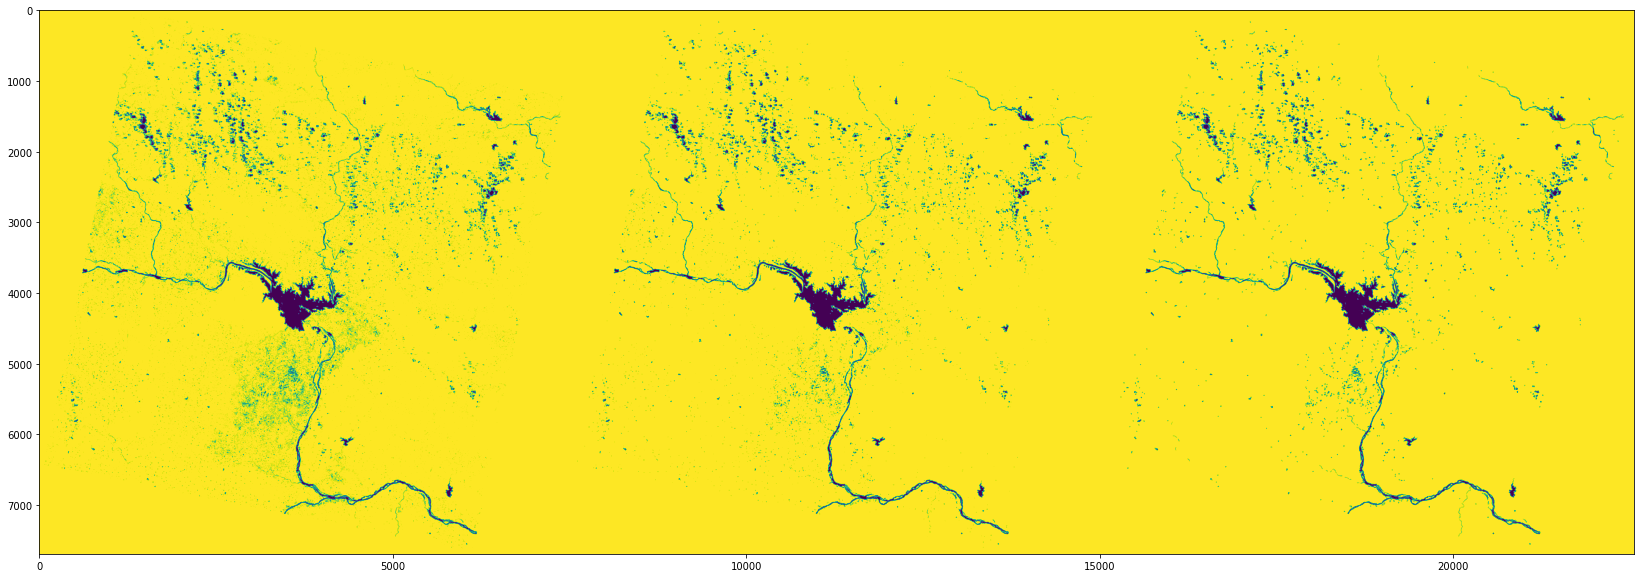

In [ ]:
ndwisw2_components = np.float32(ndwisw2_components)
compare_ndwisw2_copy = cv2.hconcat(
    [ndwisw2_copy, median_ndwisw2_copy, ndwisw2_components])
plt.figure(figsize=(30, 10))
plt.imshow(compare_ndwisw2_copy)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


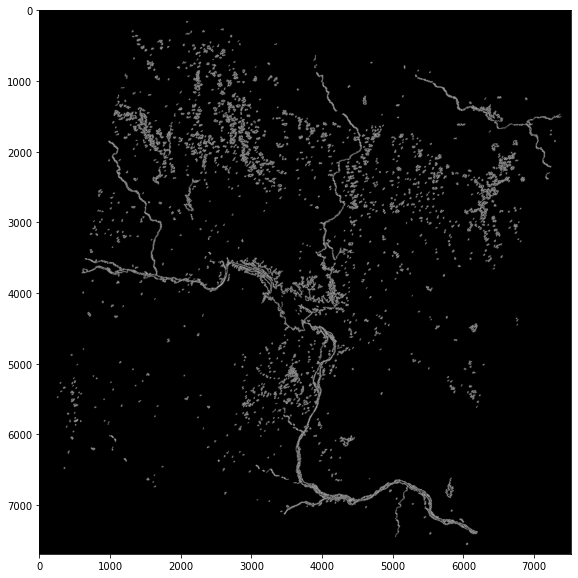

In [ ]:
ndwisw2_components = img_to_array(ndwisw2_components)
save_img('image_save_ndwisw2_components.jpg', ndwisw2_components)
image_ndwisw2_components = cv2.imread('image_save_ndwisw2_components.jpg')

img_blur_ndwisw2_components = cv2.GaussianBlur(
    image_ndwisw2_components, (3, 3), 0)
sobel_ndwisw2_components = cv2.Sobel(
    src=img_blur_ndwisw2_components, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)
plt.figure(figsize=(10, 10))
plt.imshow(sobel_ndwisw2_components)


In [ ]:
Area = 323
PixelAreaIR = (Area*(len(np.where(ndwi_copy == -100)
               [0]))/(ndwi_copy.shape[0]*ndwi_copy.shape[1]))
PixelAreaSWIR1 = (Area*(len(np.where(ndwisw1_copy == -100)
                  [0]))/(ndwisw1_copy.shape[0]*ndwisw1_copy.shape[1]))
PixelAreaSWIR2 = (Area*(len(np.where(ndwisw2_copy == -100)
                  [0]))/(ndwisw2_copy.shape[0]*ndwisw2_copy.shape[1]))

PixelMedianAreaIR = (Area*(len(np.where(median_ndwi_copy == -100)
                     [0]))/(ndwi_copy.shape[0]*ndwi_copy.shape[1]))
PixelMedianAreaSWIR1 = (Area*(len(np.where(median_ndwisw1_copy == -100)
                        [0]))/(ndwisw1_copy.shape[0]*ndwisw1_copy.shape[1]))
PixelMedianAreaSWIR2 = (Area*(len(np.where(median_ndwisw2_copy == -100)
                        [0]))/(ndwisw2_copy.shape[0]*ndwisw2_copy.shape[1]))

PixelCCAreaIR = (Area*(len(np.where(ndwi_components == -100)
                 [0]))/(ndwi_copy.shape[0]*ndwi_copy.shape[1]))
PixelCCAreaSWIR1 = (Area*(len(np.where(ndwisw1_components == -100)
                    [0]))/(ndwisw1_copy.shape[0]*ndwisw1_copy.shape[1]))
PixelCCAreaSWIR2 = (Area*(len(np.where(ndwisw2_components == -100)
                    [0]))/(ndwisw2_copy.shape[0]*ndwisw2_copy.shape[1]))

print("#### NIR ####")
print("Base :", PixelAreaIR, "KM2")
print("Median Filter :", PixelMedianAreaIR, "KM2")
print("Connected Components :", PixelCCAreaIR, "KM2")
print("\n")

print("#### SWIR1 ####")
print("Base :", PixelAreaSWIR1, "KM2")
print("Median Filter :", PixelMedianAreaSWIR1, "KM2")
print("Connected Components :", PixelCCAreaSWIR1, "KM2")
print("\n")

print("#### SWIR2 ####")
print("Base :", PixelAreaSWIR2, "KM2")
print("Median Filter :", PixelMedianAreaSWIR2, "KM2")
print("Connected Components :", PixelCCAreaSWIR2, "KM2")


#### NIR ####
Base : 3.3909186207713016 KM2
Median Filter : 3.1232392062161805 KM2
Connected Components : 3.1461502903040386 KM2


#### SWIR1 ####
Base : 4.09051357105924 KM2
Median Filter : 3.6689060687717525 KM2
Connected Components : 3.67570177662818 KM2


#### SWIR2 ####
Base : 7.941295564721472 KM2
Median Filter : 6.313888260618718 KM2
Connected Components : 6.153577679805088 KM2
